In [1]:
import tensorflow as tf
import cv2
import numpy as np

from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization

from tensorflow.keras import Model
# Trains on the x,y pixel coordinate data to predict the pixel color

In [2]:
class Coordinatizer(Model):
    def __init__(self):
        super(Coordinatizer, self).__init__()
        self.d1 = Dense(256, activation='relu')
        self.d2 = Dense(128, activation='relu')
        self.d3 = Dense(64, activation='relu')
        self.d4 = Dense(32, activation='relu')
        self.d5 = Dense(3, activation='sigmoid')
        # sigmoid last layer so that the output is between 0 - 1
        self.batch_norm = BatchNormalization()
    def call(self, x):
        x = self.d1(x)
        x = self.d2(x)
        x = self.d3(x)
        x = self.d4(x)
        x = self.d5(x)
        return x
model = Coordinatizer()
loss_object = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

In [3]:
# Metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.MeanSquaredError(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.MeanSquaredError(name='test_accuracy')

In [4]:
@tf.function
def train_step(coordinates, colors):
    with tf.GradientTape() as tape:
        predictions = model(coordinates, training=True)
        loss = loss_object(colors, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients,model.trainable_variables))
    
    train_loss(loss)
    train_accuracy(colors, predictions)

In [5]:
@tf.function
def test_step(coordinates, colors):
    predictions = model(coordinates, training=False)
    t_loss = loss_object(coordinates, predictions)
    test_loss(t_loss)
    test_accuracy(coordinates, colors)

In [129]:
def load_data():
    import cv2
    img = cv2.imread('images/yoda.jpg')
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    x_train = np.argwhere(img[:,:,0]).astype('float32')
    y_train = img.reshape(-1, 3).astype('float32') / 255
    print('X data (y, x coordinates): \n', x_train[:5], '...\n')
    print('Y data (BGR values): \n', y_train[:5], '...\n')
    return x_train, y_train
# Standard normalizing of coordinates
x_train, y_train = load_data()
x_train -= x_train.mean()
x_train /= x_train.std()

X data (y, x coordinates): 
 [[0. 0.]
 [0. 1.]
 [0. 2.]
 [0. 3.]
 [0. 4.]] ...

Y data (BGR values): 
 [[0.60784316 0.8352941  0.85882354]
 [0.61960787 0.83137256 0.85882354]
 [0.7058824  0.8784314  0.90588236]
 [0.6        0.74509805 0.7764706 ]
 [0.5019608  0.63529414 0.65882355]] ...



In [7]:
x_test, y_test = load_data()
x_test -= x_test.mean()
x_test /= x_test.std()

[[0. 0.]
 [0. 1.]
 [0. 2.]
 [0. 3.]
 [0. 4.]] ...
[[0.60784316 0.8352941  0.85882354]
 [0.61960787 0.83137256 0.85882354]
 [0.7058824  0.8784314  0.90588236]
 [0.6        0.74509805 0.7764706 ]
 [0.5019608  0.63529414 0.65882355]] ...


In [8]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(128)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(128)

Epoch 1, Loss 0.042953718453645706, Accuracy: 4.297783374786377, 
Epoch 2, Loss 0.03848912566900253, Accuracy: 3.8500912189483643, 
Epoch 3, Loss 0.036396902054548264, Accuracy: 3.6413002014160156, 
Epoch 4, Loss 0.03461609408259392, Accuracy: 3.4630684852600098, 
Epoch 5, Loss 0.03306881710886955, Accuracy: 3.308561325073242, 
Epoch 6, Loss 0.03168974444270134, Accuracy: 3.1704511642456055, 
Epoch 7, Loss 0.03090253472328186, Accuracy: 3.0921642780303955, 
Epoch 8, Loss 0.030488934367895126, Accuracy: 3.050760269165039, 
Epoch 9, Loss 0.029297959059476852, Accuracy: 2.931365728378296, 
Epoch 10, Loss 0.028772644698619843, Accuracy: 2.878523826599121, 
Epoch 11, Loss 0.027719542384147644, Accuracy: 2.7741522789001465, 
Epoch 12, Loss 0.026929369196295738, Accuracy: 2.6946778297424316, 
Epoch 13, Loss 0.02620740234851837, Accuracy: 2.6221399307250977, 
Epoch 14, Loss 0.02551623061299324, Accuracy: 2.5536396503448486, 
Epoch 15, Loss 0.02409762144088745, Accuracy: 2.4111504554748535, 
Ep

Epoch 123, Loss 0.01158919744193554, Accuracy: 1.1595274209976196, 
Epoch 124, Loss 0.01134555321186781, Accuracy: 1.1353328227996826, 
Epoch 125, Loss 0.011508998461067677, Accuracy: 1.1513954401016235, 
Epoch 126, Loss 0.011461440473794937, Accuracy: 1.1469409465789795, 
Epoch 127, Loss 0.011542392894625664, Accuracy: 1.1547491550445557, 
Epoch 128, Loss 0.01164774876087904, Accuracy: 1.1647920608520508, 
Epoch 129, Loss 0.011279194615781307, Accuracy: 1.1283425092697144, 
Epoch 130, Loss 0.011354134418070316, Accuracy: 1.1360582113265991, 
Epoch 131, Loss 0.011315458454191685, Accuracy: 1.131864070892334, 
Epoch 132, Loss 0.01141856238245964, Accuracy: 1.1425821781158447, 
Epoch 133, Loss 0.011338064447045326, Accuracy: 1.1345065832138062, 
Epoch 134, Loss 0.01127665489912033, Accuracy: 1.127909541130066, 
Epoch 135, Loss 0.01127864420413971, Accuracy: 1.1285227537155151, 
Epoch 136, Loss 0.011544189415872097, Accuracy: 1.1549766063690186, 
Epoch 137, Loss 0.011132631450891495, Accu

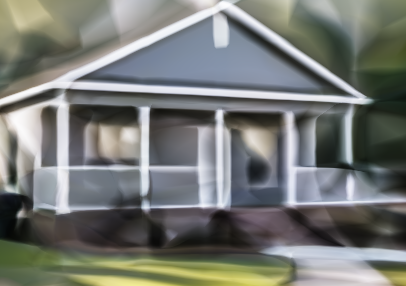

In [9]:
EPOCHS = 150
for epoch in range(EPOCHS):
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()
    
    for coordinates, colors in train_ds:
        train_step(coordinates, colors)
    print(
        f'Epoch {epoch + 1}, '
        f'Loss {train_loss.result()}, '
        f'Accuracy: {train_accuracy.result() * 100}, '
    )
from PIL import Image
results = []
ground_truth = []
img = cv2.imread('images/yoda.jpg')
h, w = img.shape[:2]
for coordinate, color in test_ds:
    result = model(coordinate, training=False).numpy().tolist()
    results.extend(result)
    # ground_truth.extend(color)
results = np.array(results)
# ground_truth = np.array(ground_truth)
Image.fromarray(cv2.cvtColor((results.reshape((h, w, 3)) * 255).astype(np.uint8), cv2.COLOR_BGR2RGB))